# Analiza Danych - Shopping Trends

## Import bibliotek

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


## Załadowanie i wstępne przetwarzanie danych

In [5]:

data = pd.read_csv('shopping_trends.csv')

# zmiana na wartości liczbowe
data['Purchase Amount (USD)'] = pd.to_numeric(data['Purchase Amount (USD)'], errors='coerce')
data['Review Rating'] = pd.to_numeric(data['Review Rating'], errors='coerce')


## Wizualizacja danych

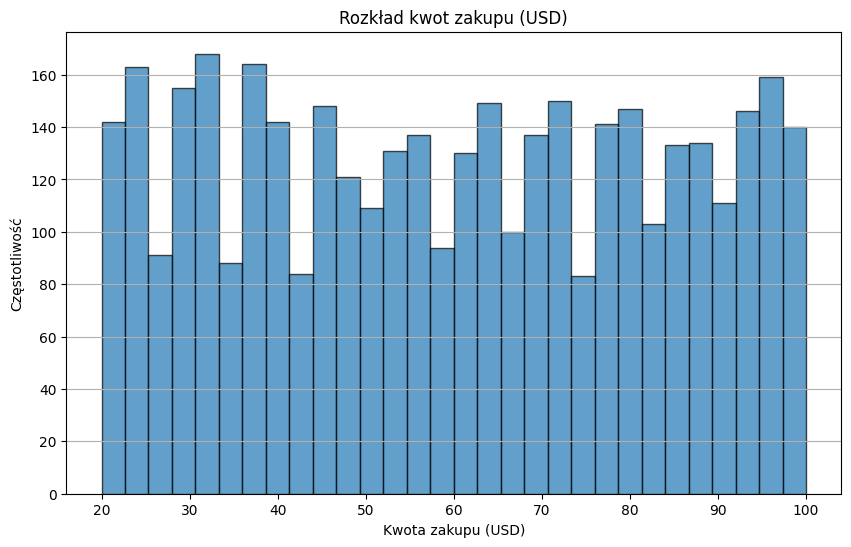

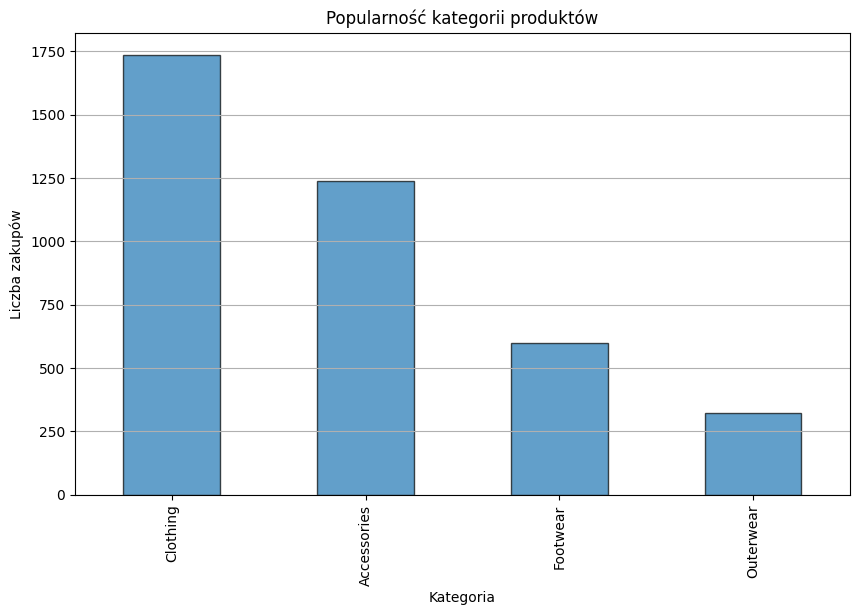

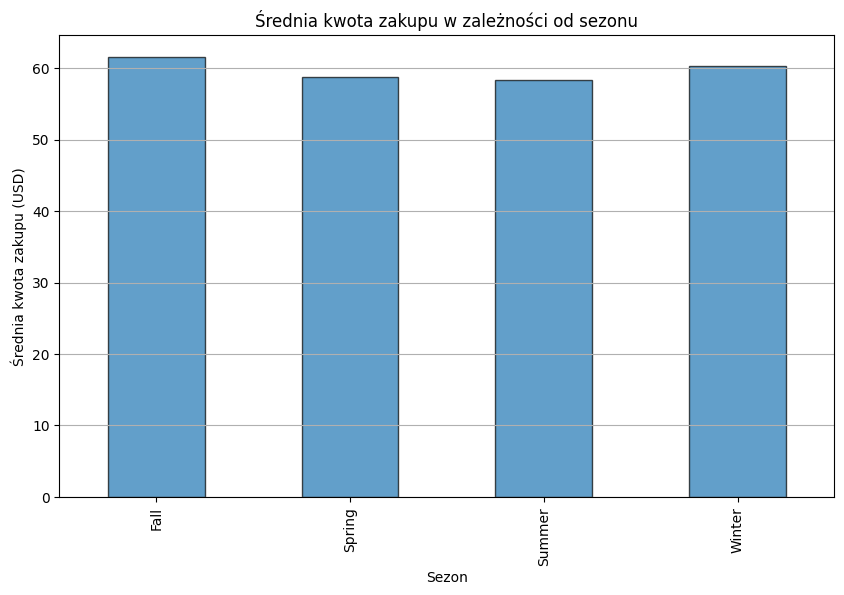

In [7]:

plt.figure(figsize=(10, 6))
plt.hist(data['Purchase Amount (USD)'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Rozkład kwot zakupu (USD)')
plt.xlabel('Kwota zakupu (USD)')
plt.ylabel('Częstotliwość')
plt.grid(axis='y')
plt.show()

# Popularność kategorii produktów
category_counts = data['Category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Popularność kategorii produktów')
plt.xlabel('Kategoria')
plt.ylabel('Liczba zakupów')
plt.grid(axis='y')
plt.show()

# Średnia ilość zakupów per sezon
avg_purchase_by_season = data.groupby('Season')['Purchase Amount (USD)'].mean()
plt.figure(figsize=(10, 6))
avg_purchase_by_season.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Średnia kwota zakupu w zależności od sezonu')
plt.xlabel('Sezon')
plt.ylabel('Średnia kwota zakupu (USD)')
plt.grid(axis='y')
plt.show()


## Testy statystyczne

In [8]:

# Test różnicy w kwocie zakupu ze względu na płeć
male_purchases = data[data['Gender'] == 'Male']['Purchase Amount (USD)']
female_purchases = data[data['Gender'] == 'Female']['Purchase Amount (USD)']

t_stat_gender, p_value_gender = ttest_ind(male_purchases, female_purchases, equal_var=False)
t_stat_gender, p_value_gender

# Korelacja pomiędzy wiekiem a kwotą zakupu
correlation_age_purchase = data[['Age', 'Purchase Amount (USD)']].corr()
correlation_age_purchase


,Age,Purchase Amount (USD)
Age,1.000000,-0.010424
Purchase Amount (USD),-0.010424,1.000000


## Model predykcyjny

In [9]:

# Przygotowanie danych do regresji
features = ['Age', 'Previous Purchases']
target = 'Purchase Amount (USD)'

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(np.float64(20.752149624043607), -0.006611821627266368)

## Wnioski


- Rozkład kwot zakupu pokazuje szeroki zakres, z wyraźnym skupieniem w niższych wartościach.
- Brak istotnej statystycznie różnicy w wydatkach między płciami.
- Model predykcyjny na bazie regresji liniowej nie wykazał użyteczności dla przewidywania kwot zakupu.
